NAME : Y.SREE HARI

SECTION : K21UR

ROLL.NO : 55

## CROP RECOMMENDATION  USING ML

### STEP 1: Reading and Understanding the Data
 Let's start with the following steps:

- 1.Importing data using the pandas library
- 2.Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records
dataset = pd.read_csv("Crop_dataset.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil rainfall - rainfall in mm

Let's inspect the various aspects of our dataframe

### Renaming the columns    

In [4]:
dataset.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Crop"]
dataset.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Checking the shape
dataset.shape

(2200, 8)

In [6]:
# Checking the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# Describibg the data
dataset.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Step 2: Visualising the Data
- Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated .

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Finding correlation
dataset[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall']].corr()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### Splitting data into dependent and independent variables

In [10]:
x = dataset.iloc[:, :-1].values # independent
y = dataset.iloc[:, -1].values # dependent

In [11]:
x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [12]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

### Displaying the unique features

In [13]:
np.unique(y)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

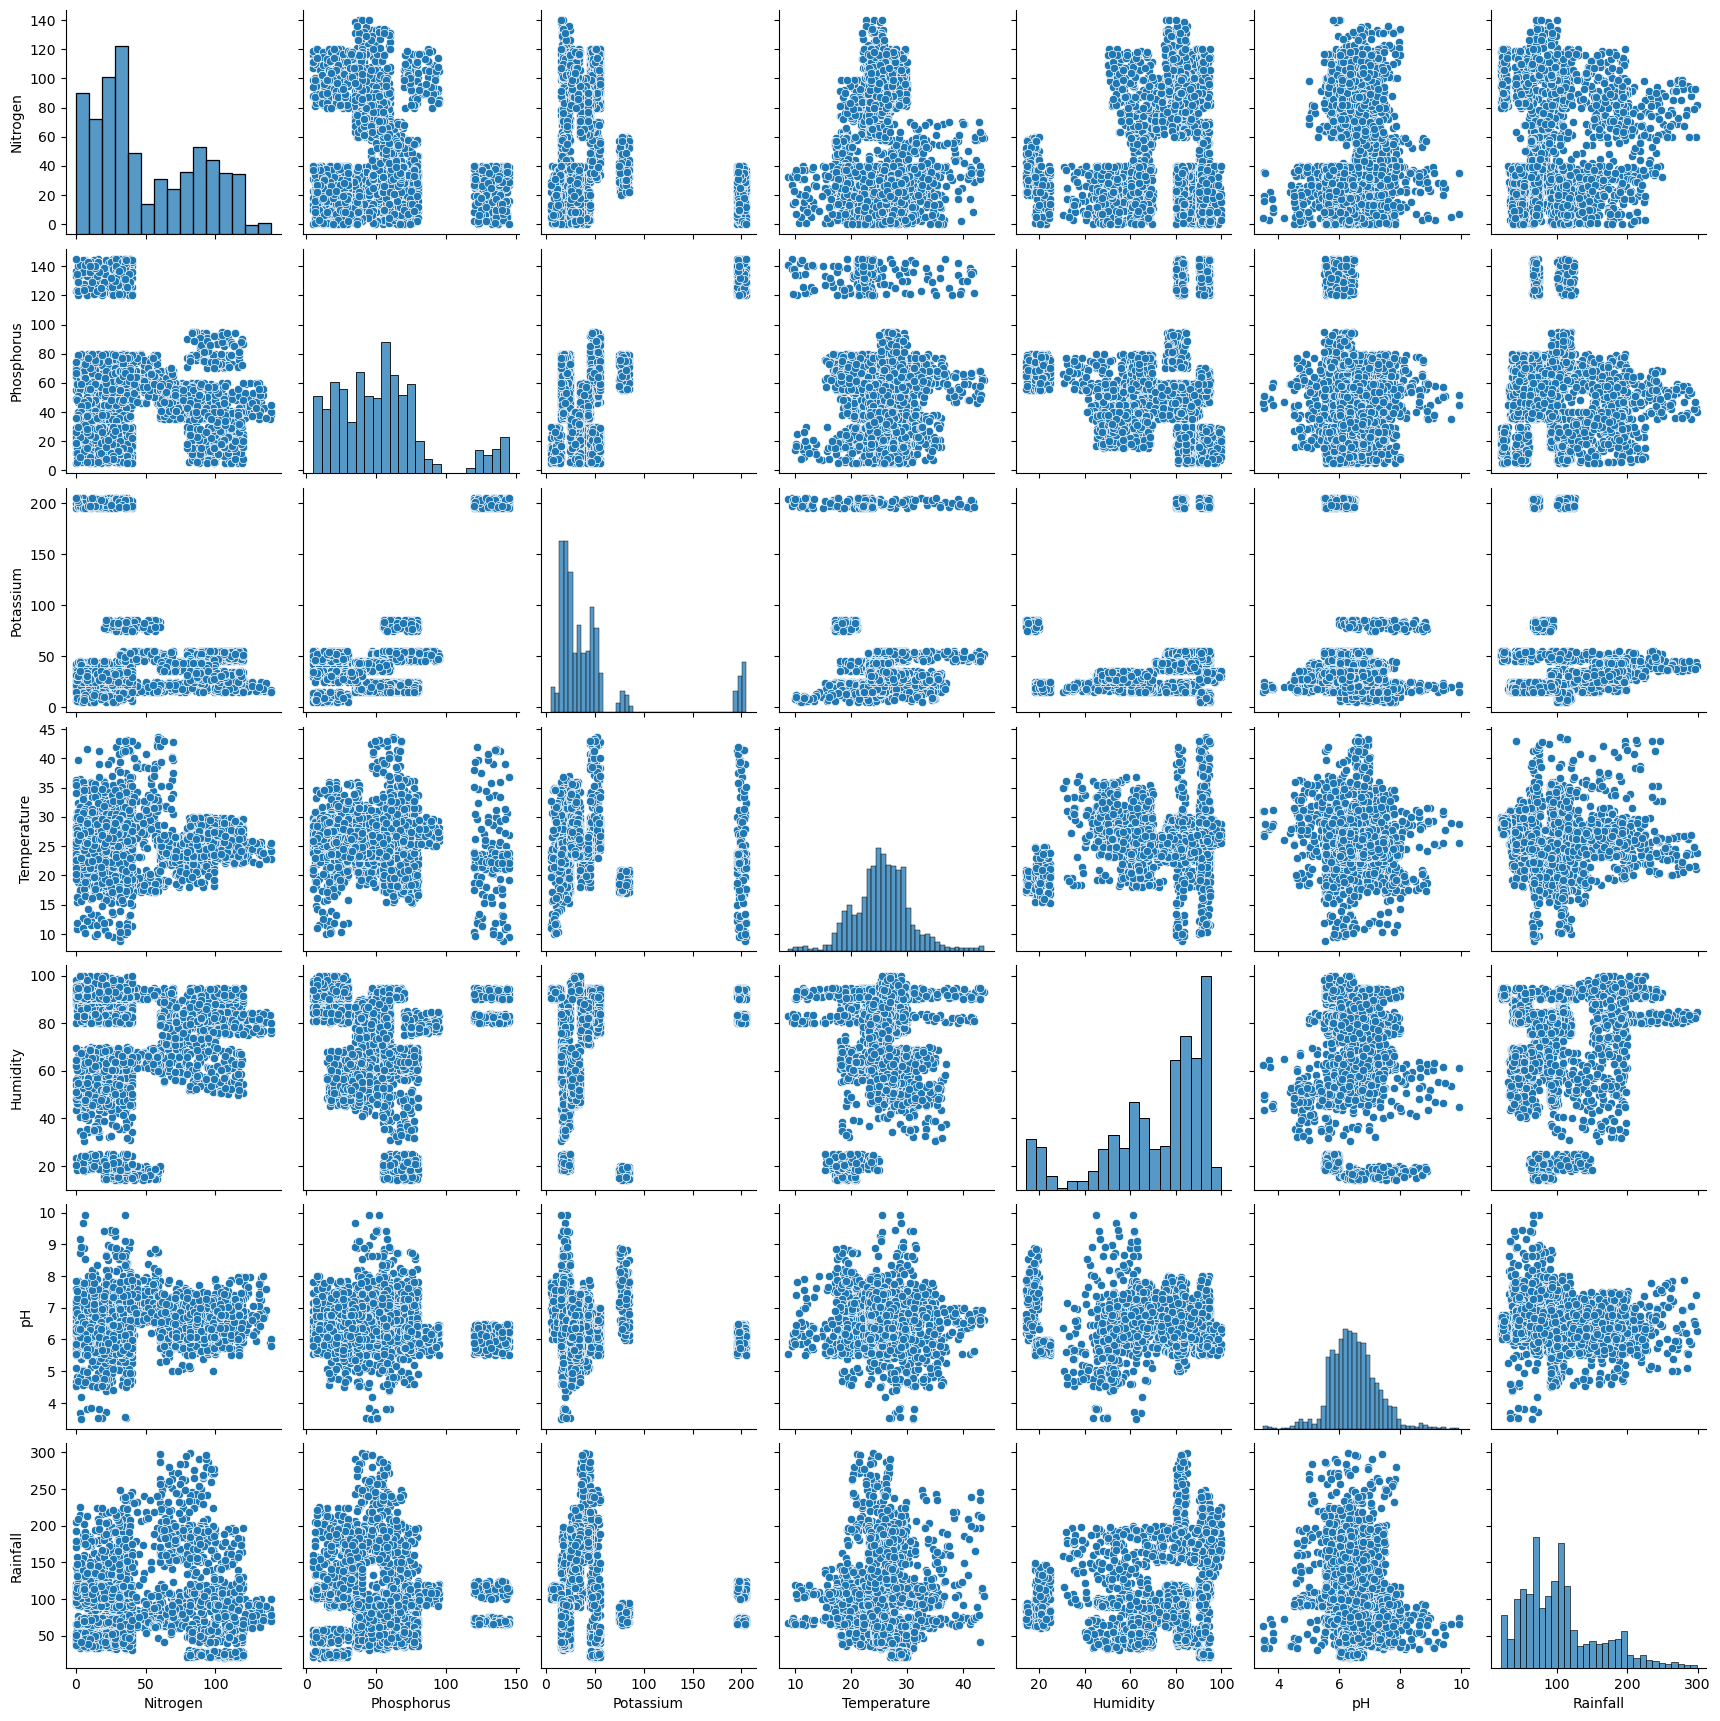

In [14]:
sns.pairplot(data=dataset)

In [15]:
len(np.unique(y))

22

### Visualizing crop vs climate features using boxplots

<Axes: xlabel='pH', ylabel='Crop'>

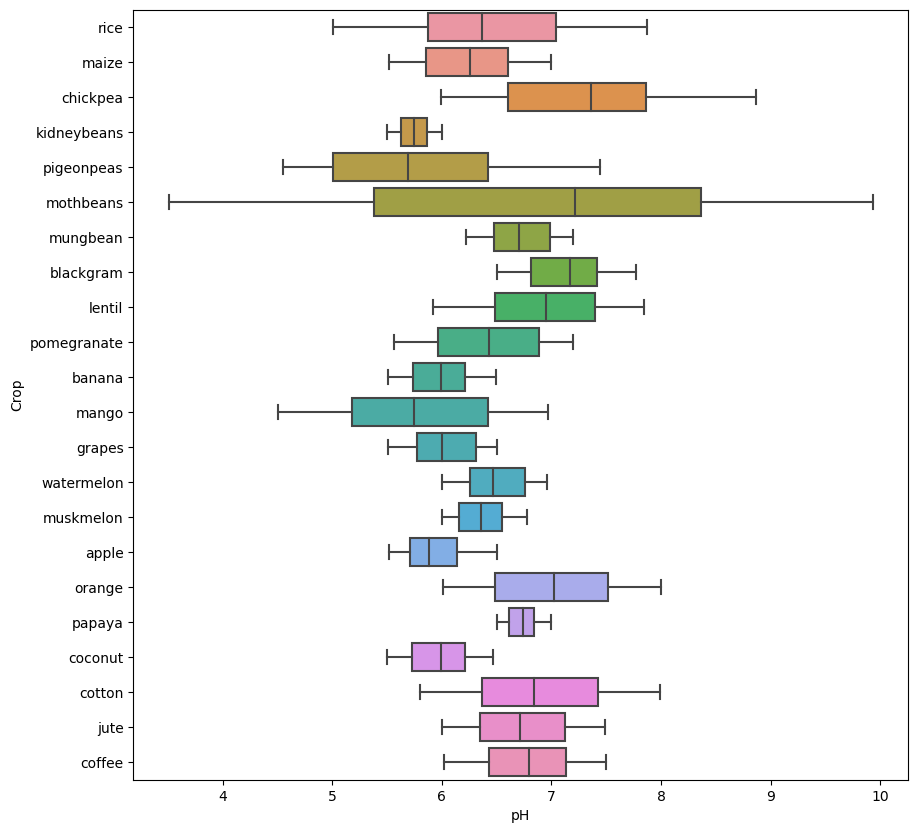

In [16]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='pH',data=dataset)

<Axes: xlabel='Temperature', ylabel='Crop'>

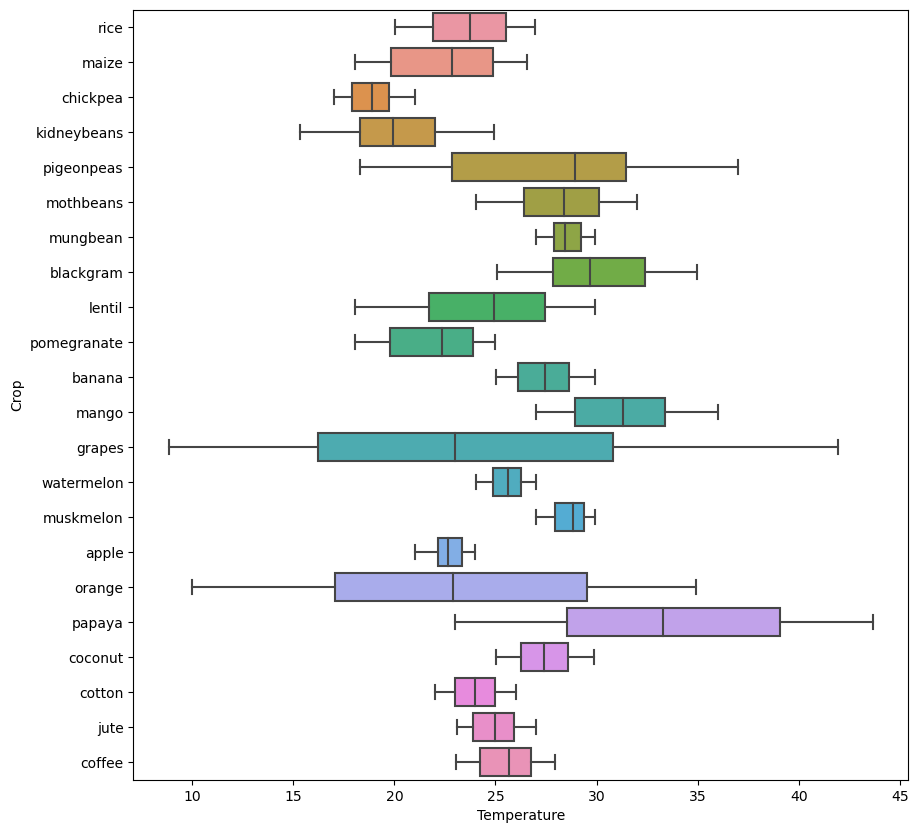

In [17]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='Temperature',data=dataset)

<Axes: xlabel='Rainfall', ylabel='Crop'>

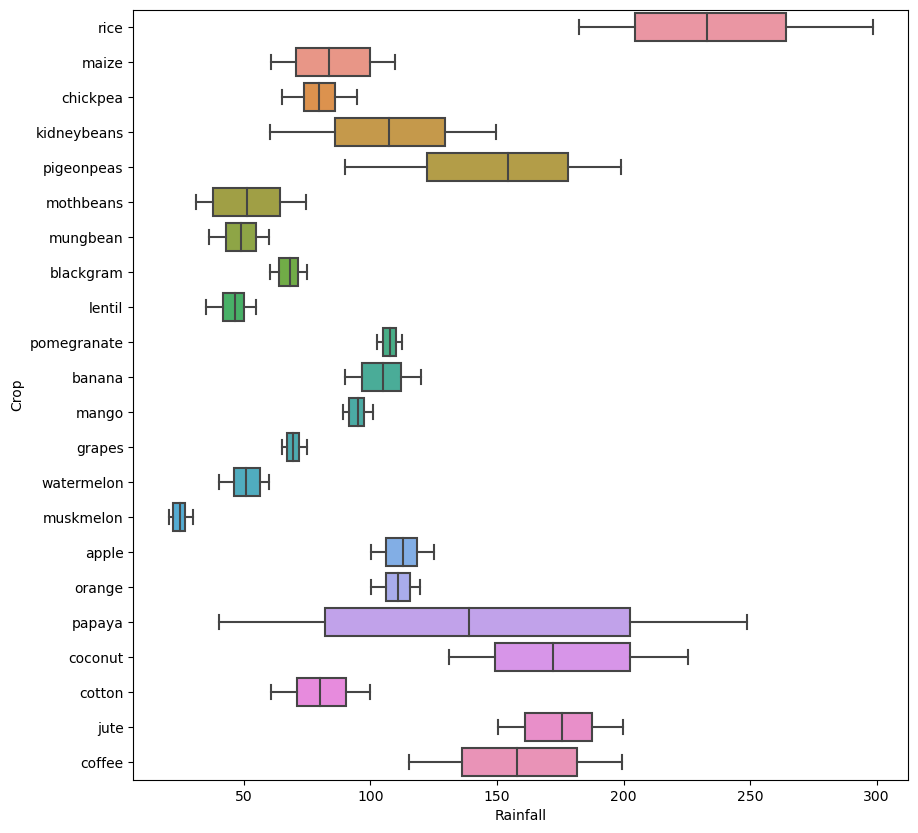

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='Rainfall',data=dataset)

### Encoding categorical values

In [19]:
np.unique(y)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
y = L.fit_transform(y)

In [21]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
x

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

### Splitting training and testing data

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [25]:
x_train.shape

(1760, 7)

In [26]:
x_test.shape

(440, 7)

In [27]:
y_train.shape

(1760,)

In [28]:
y_test.shape

(440,)

## Training the Decision tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

### Testing the Model

In [30]:
pred_dt = dt_classifier.predict(x_test)
pred_dt

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9,  2, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### Calculating Accuracy Score

In [32]:
# Accuracy
dt_accuracy = accuracy_score(y_test, pred_dt)
print("Accuracy:", dt_accuracy)

Accuracy: 0.9886363636363636


### Calculating Precision Score

In [33]:
# Precision
dt_precision = precision_score(y_test, pred_dt,average="weighted")
print("Precision:", dt_precision)

Precision: 0.9889971139971141


### Calculating Recall Score

In [34]:
# Recall
dt_recall = recall_score(y_test, pred_dt,average="weighted")
print("Recall:", dt_recall)

Recall: 0.9886363636363636


### Calculating F1 Score

In [35]:
# F1 Score
dt_f1 = f1_score(y_test, pred_dt,average="weighted")
print("F1 Score:", dt_f1)

F1 Score: 0.988595068964984


### Train_Score

In [36]:
dt_training_score = dt_classifier.score(x_train, y_train)
print("Training Score:", dt_training_score)

Training Score: 1.0


### Test_Score

In [37]:
dt_testing_score = dt_classifier.score(x_test, y_test)
print("Testing Score:", dt_testing_score)

Testing Score: 0.9886363636363636


### Confusion Matrix

<Axes: >

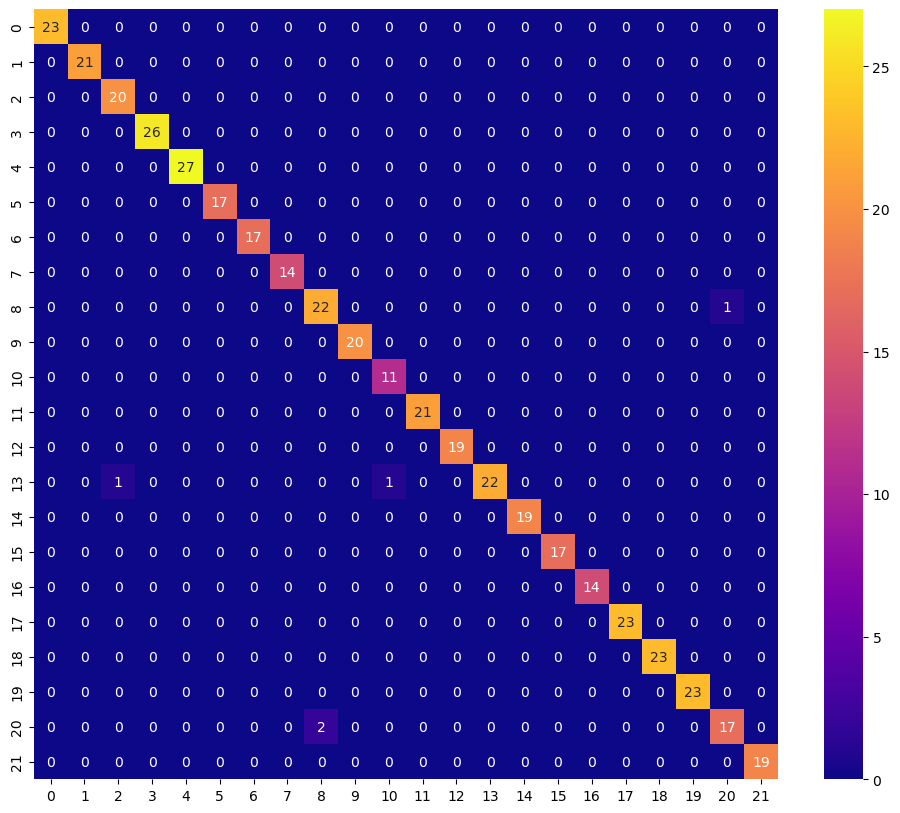

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, ax=ax, cmap="plasma")

## Training the SGD Classifier
 - Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm that is used for optimizing machine learning models

In [39]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

### Testing the Model

In [40]:
pred_sgd = sgd_classifier.predict(x_test)

In [41]:
pred_sgd

array([15, 21, 17, 17,  0, 12,  0, 11, 14, 10,  2,  4, 19,  8,  4,  8,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11,  8, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 11, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  8,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17,  8, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  8,  3,  2,  4, 11,  1, 13,  8,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14,  2,  4, 11,  0,  4,  9, 11, 14, 10, 21,
       14, 18, 11, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12,  8, 21,  9,  2,  0,  2,  3,  7,  7,  1,  6,
       20,  8,  8,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

### Calculating Accuracy score

In [42]:
from sklearn.metrics import accuracy_score
sgd_accuracy=accuracy_score(y_test, pred_sgd)
sgd_accuracy

0.9159090909090909

### Calculating Precision Score

In [43]:
# Precision
sgd_precision = precision_score(y_test, pred_sgd,average="weighted")
print("Precision:", sgd_precision)

Precision: 0.9430321196151237


### Calculating Recall Score

In [44]:
# Recall
sgd_recall = recall_score(y_test, pred_sgd,average="weighted")
print("Recall:", sgd_recall)

Recall: 0.9159090909090909


### Calculating F1 Score

In [45]:
# F1 Score
sgd_f1 = f1_score(y_test, pred_sgd,average="weighted")
print("F1 Score:", sgd_f1)

F1 Score: 0.9213949860189847


### Train_Score

In [46]:
sgd_training_score = sgd_classifier.score(x_train, y_train)
print("Training Score:", sgd_training_score)

Training Score: 0.9386363636363636


### Test_Score

In [47]:
sgd_testing_score = sgd_classifier.score(x_train, y_train)
print("Testing Score:", sgd_testing_score)

Testing Score: 0.9386363636363636


### Confusion Matrix

<Axes: >

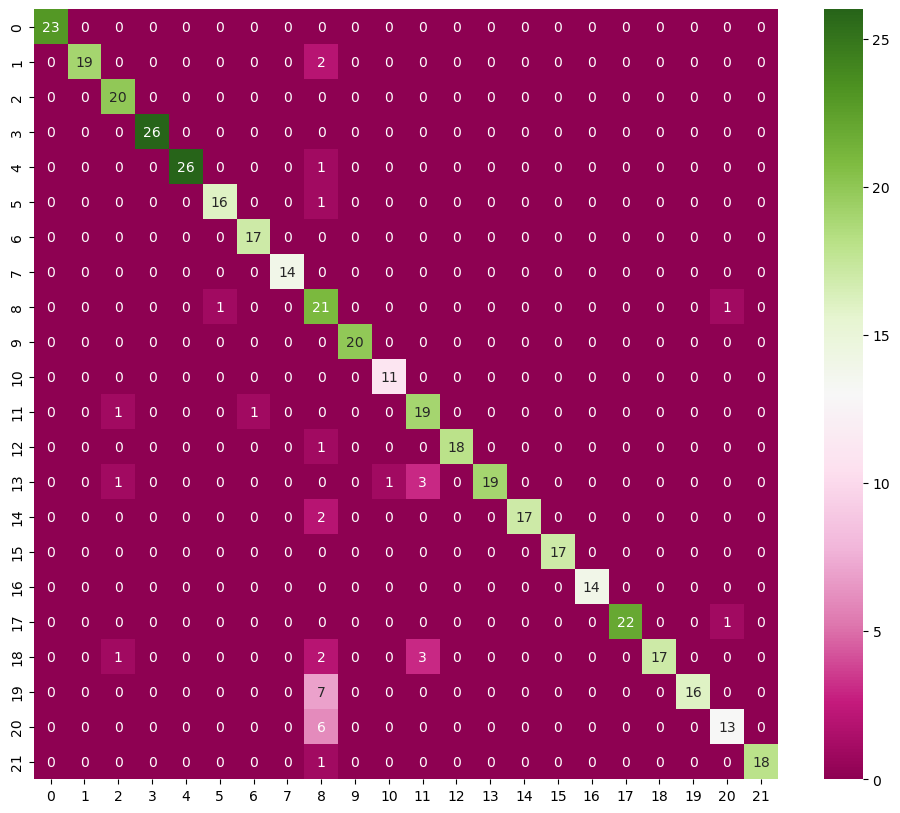

In [48]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_sgd), annot=True, ax=ax, cmap="PiYG")

## Training the KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 2)
kn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

### Testing the Model

In [50]:
y_pred_knn = kn_classifier.predict(x_test)

In [51]:
y_pred_knn

array([15, 21, 17, 17,  0, 12,  0, 10, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18,  8, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11,  2,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 14, 12, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 19,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6,  8, 18, 12,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 10,  1,  9, 19,  3,  4, 16,
       12,  1,  1,  0,  9, 15, 14,  2,  4,  6,  0,  4,  9, 13, 14, 10, 21,
       14, 12, 10, 18,  9, 11,  8,  3,  0,  4,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
        8, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0,  8,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

### Calculating Accuracy score

In [52]:
from sklearn.metrics import  accuracy_score
kn_accuracy=accuracy_score(y_test, y_pred_knn)
kn_accuracy

0.9159090909090909

### Calculating Precision Score

In [53]:
# Precision
kn_precision = precision_score(y_test, y_pred_knn,average="weighted")
print("Precision:", kn_precision)

Precision: 0.9335022169317924


### Calculating Recall Score

In [54]:
# Recall
kn_recall = recall_score(y_test, y_pred_knn,average="weighted")
print("Recall:", kn_recall)

Recall: 0.9159090909090909


### Calculating F1 Score

In [55]:
# F1 Score
kn_f1 = f1_score(y_test, y_pred_knn,average="weighted")
print("F1 Score:", kn_f1)

F1 Score: 0.9135531099766033


### Train_Score

In [56]:
kn_training_score = kn_classifier.score(x_train, y_train)
print("Training Score:", kn_training_score)

Training Score: 0.9528409090909091


### Test_Score

In [57]:
kn_testing_score = kn_classifier.score(x_test, y_test)
print("Testing Score:", kn_testing_score)

Testing Score: 0.9159090909090909


### Confusion Matrix

<Axes: >

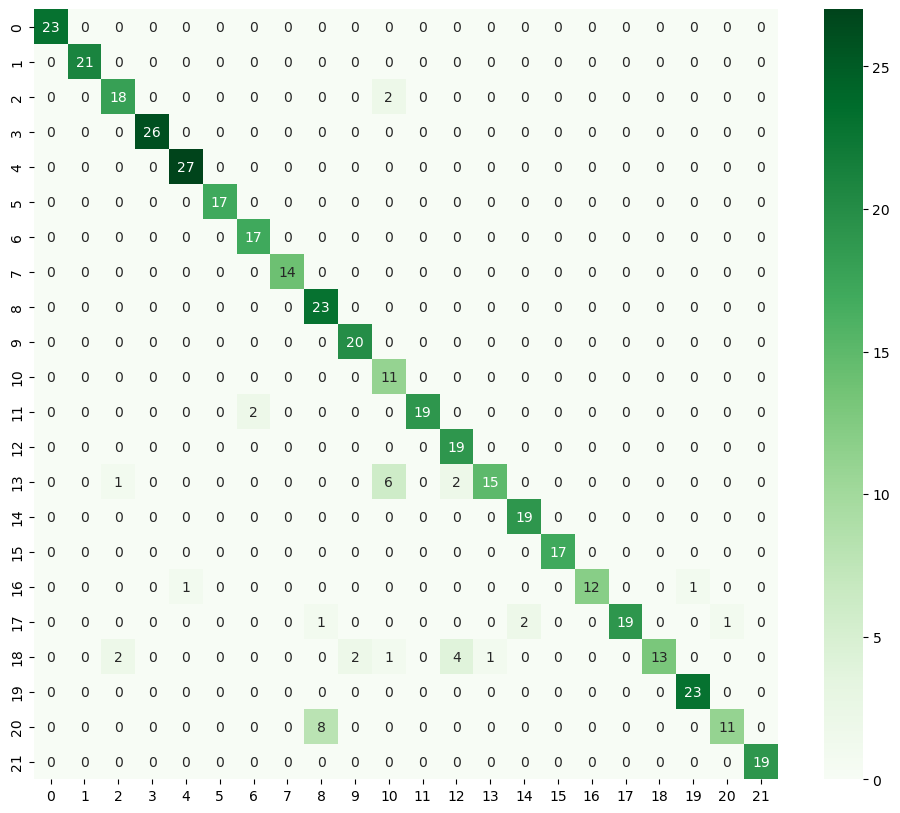

In [58]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, ax=ax, cmap="Greens")

In [59]:
from sklearn.ensemble import VotingClassifier
models = [("DT", dt_classifier),
         ("SGD", sgd_classifier),
          ("KNN", kn_classifier)]

vt_classifier = VotingClassifier(estimators=models, voting="hard")

## Training the Ensemble Model

In [60]:
vt_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('SGD', SGDClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=23))])

##  Testing the Model

In [61]:
 pred_vt = vt_classifier.predict(x_test)
pred_vt

array([15, 21, 17, 17,  0, 12,  0,  8, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17,  8, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18,  8,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  6,  0,  4,  9,  2, 14, 10, 21,
       14,  2,  8, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

##  Calculating accuracy score

In [62]:
en_accuracy=accuracy_score(y_test, pred_vt)
en_accuracy

0.9545454545454546

### Calculating Precision Score

In [63]:
# Precision
en_precision = precision_score(y_test, pred_vt,average="weighted")
print("Precision:", en_precision)

Precision: 0.9621054292929292


### Calculating Recall Score

In [64]:
# Recall
en_recall = recall_score(y_test, pred_vt,average="weighted")
print("Recall:", en_recall)

Recall: 0.9545454545454546


### Calculating F1 Score

In [65]:
# F1 Score
en_f1 = f1_score(y_test, pred_vt,average="weighted")
print("F1 Score:", en_f1)

F1 Score: 0.9551103965675717


### Train_Score

In [66]:
en_training_score = vt_classifier.score(x_train, y_train)
print("Training Score:", en_training_score)

Training Score: 0.9875


### Test_Score

In [67]:
en_testing_score = vt_classifier.score(x_test ,y_test)
print("Testing Score:", en_testing_score)

Testing Score: 0.9545454545454546


## Confusion Matrix

<Axes: >

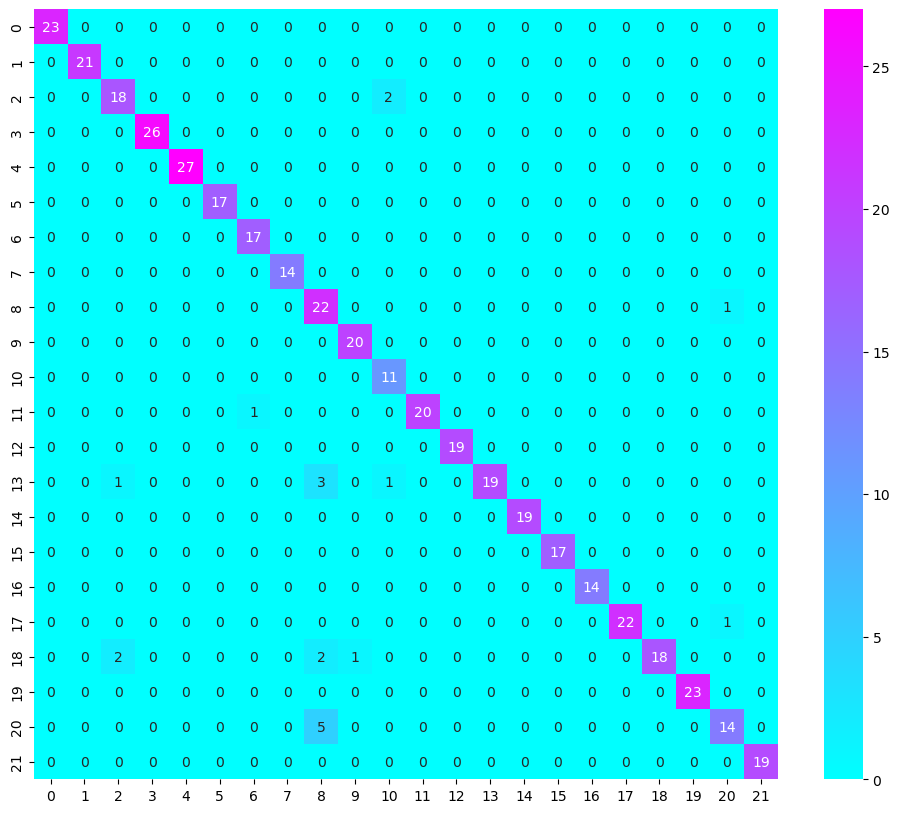

In [68]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_vt), annot=True, ax=ax, cmap="cool")

## Training Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Testing the Model

In [71]:
# Make predictions on the test set
y_pred_RF = rf_classifier.predict(x_test)
y_pred_RF

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

### Calculating accuracy score

In [72]:
rf_accuracy = accuracy_score(y_test, y_pred_RF)
rf_accuracy

0.9931818181818182

### Calculating Precision Score

In [73]:
# Precision
rf_precision = precision_score(y_test, y_pred_RF,average="weighted")
print("Precision:", rf_precision)

Precision: 0.9937348484848485


### Calculating Recall Score

In [74]:
# Recall
rf_recall = recall_score(y_test, y_pred_RF,average="weighted")
print("Recall:", rf_recall)

Recall: 0.9931818181818182


### Calculating F1 Score

In [75]:
# F1 Score
rf_f1 = f1_score(y_test, y_pred_RF,average="weighted")
print("F1 Score:", rf_f1)

F1 Score: 0.9931754816901672


### Train_Score

In [76]:
rf_training_score = rf_classifier.score(x_train, y_train)
print("Training Score:", rf_training_score)

Training Score: 1.0


### Test_Score

In [77]:
rf_testing_score = rf_classifier.score(x_test, y_test)
print("Testing Score:", rf_testing_score)

Testing Score: 0.9931818181818182


## Confusion Matrix

<Axes: >

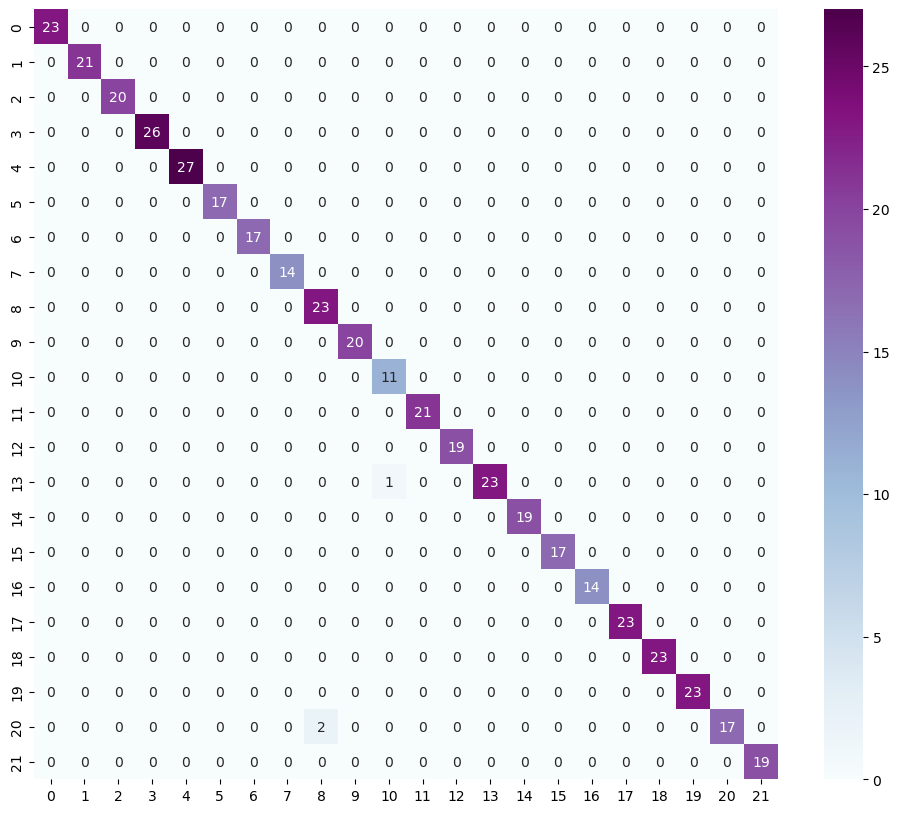

In [78]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, ax=ax, cmap="BuPu")

## Training Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

### Testing the Model

In [81]:
# Make predictions on the test set
y_pred_LR = logistic_model.predict(x_test)
y_pred_LR

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  6,  0,  4,  9, 18, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21, 18, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

### Calculating accuracy score

In [82]:
# Evaluate the model's performance
lr_accuracy = accuracy_score(y_test, y_pred_LR)
lr_accuracy

0.9636363636363636

### Calculating Precision Score

In [83]:
# Precision
lr_precision = precision_score(y_test, y_pred_LR,average="weighted")
print("Precision:", lr_precision)

Precision: 0.9644420567548909


### Calculating Recall Score

In [84]:
# Recall
lr_recall = recall_score(y_test, y_pred_LR,average="weighted")
print("Recall:", lr_recall)

Recall: 0.9636363636363636


### Calculating F1 Score

In [85]:
# F1 Score
lr_f1 = f1_score(y_test, y_pred_LR,average="weighted")
print("F1 Score:", lr_f1)

F1 Score: 0.9635115059268676


### Train_Score

In [86]:
lr_training_score=logistic_model.score(x_train,y_train)
print("Training score :",lr_training_score)

Training score : 0.977840909090909


### Test_Score

In [87]:
lr_testing_score=logistic_model.score(x_test,y_test)
print("Testing score :",lr_testing_score)

Testing score : 0.9636363636363636


## Confusion Matrix

<Axes: >

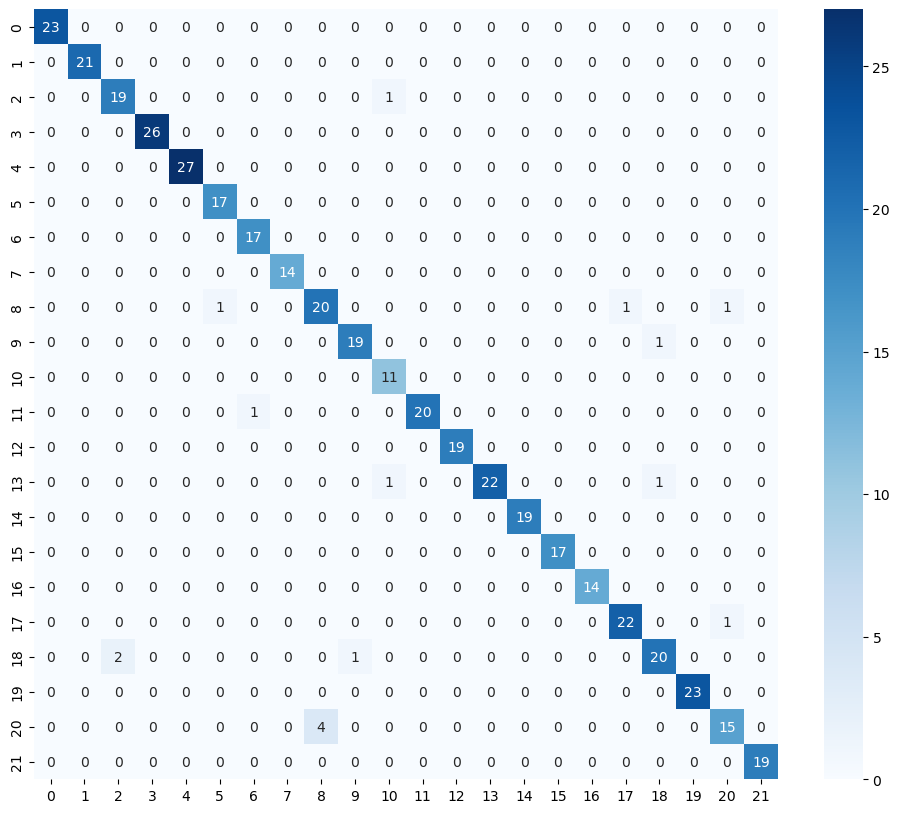

In [88]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, ax=ax, cmap="Blues")

## Training Support Vector Machine (SVM) model

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [90]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

### Testing the Model

In [91]:
# Make predictions on the test set
y_pred_SVM = svm_classifier.predict(x_test)
y_pred_SVM

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  6,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

### Calculating accuracy score

In [92]:
# Evaluate the model's performance
svm_accuracy = accuracy_score(y_test, y_pred_SVM)
svm_accuracy

0.9772727272727273

### Calculating Precision Score

In [93]:
# Precision
svm_precision = precision_score(y_test, y_pred_SVM,average="weighted")
print("Precision:", svm_precision)

Precision: 0.9787326467724194


### Calculating Recall Score

In [94]:
# Recall
svm_recall = recall_score(y_test, y_pred_SVM,average="weighted")
print("Recall:", svm_recall)

Recall: 0.9772727272727273


### Calculating F1 Score

In [95]:
# F1 Score
svm_f1 = f1_score(y_test, y_pred_SVM,average="weighted")
print("F1 Score:", svm_f1)

F1 Score: 0.9770616589588196


### Train_Score

In [96]:
svm_training_score = svm_classifier.score(x_train, y_train)
print("Training Score:", svm_training_score)

Training Score: 0.9886363636363636


### Test_Score

In [97]:
svm_testing_score = svm_classifier.score(x_test, y_test)
print("Training Score:", svm_testing_score)

Training Score: 0.9772727272727273


## Confusion Matrix

<Axes: >

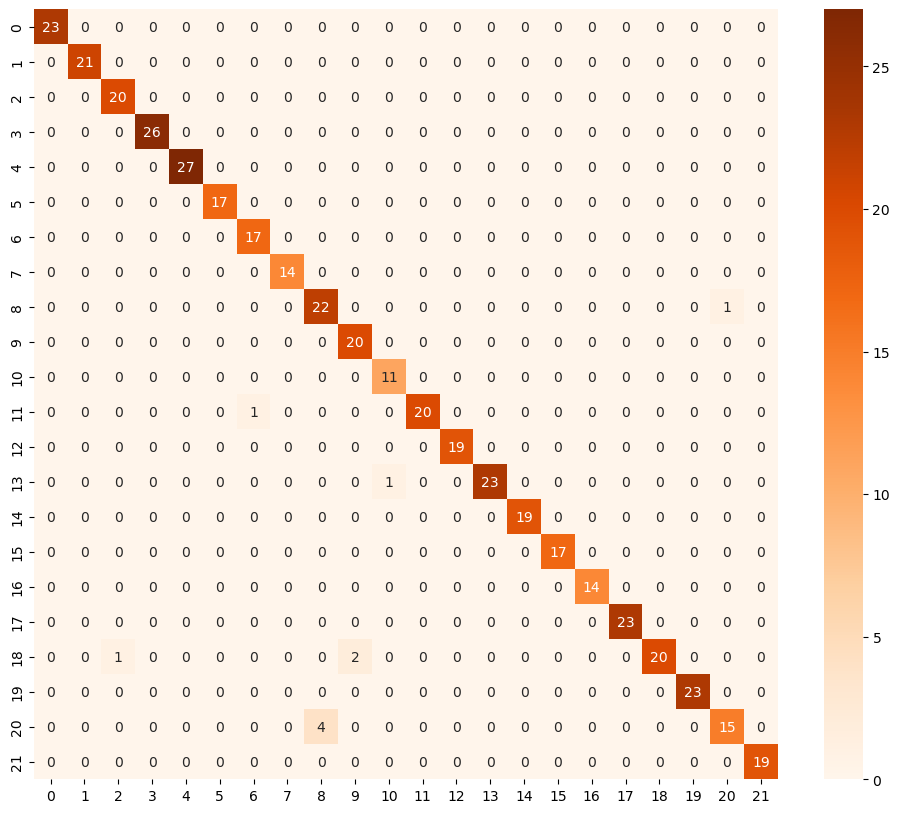

In [98]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, ax=ax, cmap="Oranges")

## Training Navie Bayes Model

In [99]:
# Import the necessary library
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [100]:
# Create a Naive Bayes classifier
Navie_Bayes_classifier = GaussianNB()
Navie_Bayes_classifier.fit(x_train, y_train)

GaussianNB()

### Testing the Model

In [101]:
# Make predictions on the test set
y_pred_NB = Navie_Bayes_classifier.predict(x_test)
y_pred_NB

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

### Calculating accuracy score

In [102]:
# Evaluate the model's performance
nv_accuracy = accuracy_score(y_test, y_pred_NB)
nv_accuracy

0.9954545454545455

### Calculating Precision Score

In [103]:
# Precision
nv_precision = precision_score(y_test, y_pred_NB,average="weighted")
print("Precision:", nv_precision)

Precision: 0.9958181818181817


### Calculating Recall Score

In [104]:
# Recall
nv_recall = recall_score(y_test, y_pred_NB,average="weighted")
print("Recall:", nv_recall)

Recall: 0.9954545454545455


### Calculating F1 Score

In [105]:
# F1 Score
nv_f1 = f1_score(y_test, y_pred_NB,average="weighted")
print("F1 Score:", nv_f1)

F1 Score: 0.9954229797979799


### Train_Score

In [106]:
nv_training_score = Navie_Bayes_classifier.score(x_train, y_train)
print("Training Score:", nv_training_score)

Training Score: 0.9948863636363636


### Test_Score

In [107]:
nv_testing_score = Navie_Bayes_classifier.score(x_test, y_test)
print("Testing Score:", nv_testing_score)

Testing Score: 0.9954545454545455


## Confusion Matrix

<Axes: >

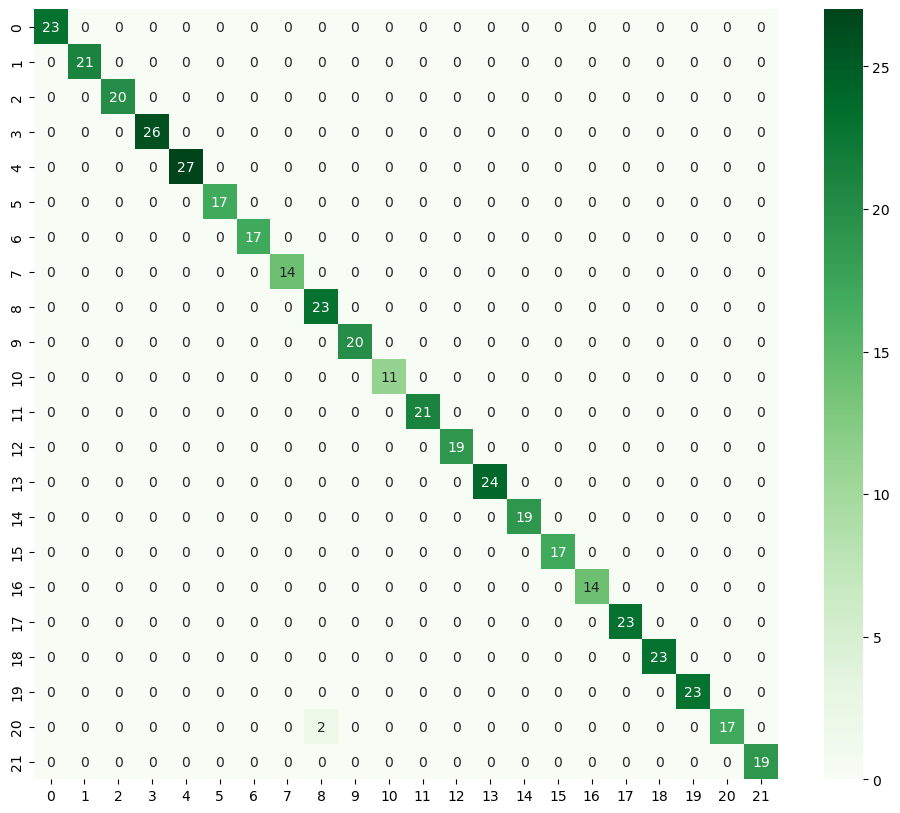

In [108]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True, ax=ax, cmap="Greens")

## FINAL CONCLUSIONS

In [109]:
Index=['Accuracy_Score','Precision_Score','Recall_Score','F1_Score','Train_Score','Test_Score']

In [110]:
conclusion = pd.DataFrame({'DT_Model':[dt_accuracy,dt_precision,dt_recall,dt_f1,dt_training_score,dt_testing_score],
           'SGD_Model':[sgd_accuracy,sgd_precision,sgd_recall,sgd_f1,sgd_training_score,sgd_testing_score],
            'KNN_Model':[kn_accuracy,kn_precision,kn_recall,kn_f1,kn_training_score,kn_testing_score],
            'Ensemble_Model':[en_accuracy,en_precision,en_recall,en_f1,en_training_score,en_testing_score],
            'Random Forest_Model':[rf_accuracy,rf_precision,rf_recall,rf_f1,rf_training_score,rf_testing_score],
            'SVM_Model':[svm_accuracy,svm_precision,svm_recall,svm_f1,svm_training_score,svm_testing_score],
            'Logistic Regression_Model':[lr_accuracy,lr_precision,lr_recall,lr_f1,lr_training_score,lr_testing_score],
            'Navie Bayes_Model':[nv_accuracy,nv_precision,nv_recall,nv_f1,nv_training_score,nv_testing_score]},index=Index)

In [111]:
summary_of_models=(round(conclusion,2))
summary_of_models

,DT_Model,SGD_Model,KNN_Model,Ensemble_Model,Random Forest_Model,SVM_Model,Logistic Regression_Model,Navie Bayes_Model
Accuracy_Score,0.99,0.92,0.92,0.95,0.99,0.98,0.96,1.00
Precision_Score,0.99,0.94,0.93,0.96,0.99,0.98,0.96,1.00
Recall_Score,0.99,0.92,0.92,0.95,0.99,0.98,0.96,1.00
F1_Score,0.99,0.92,0.91,0.96,0.99,0.98,0.96,1.00
Train_Score,1.00,0.94,0.95,0.99,1.00,0.99,0.98,0.99
Test_Score,0.99,0.94,0.92,0.95,0.99,0.98,0.96,1.00


## Testing on foreign data

In [112]:
outside_data = np.array([[60, 55, 45, 21.408, 83.329, 5.935, 287.576]])
outside_data = sc.transform(outside_data)

In [113]:
outside_data

array([[ 0.25598625,  0.04964684, -0.06219024, -0.83124202,  0.53225002,
        -0.69075533,  3.35079335]])

In [114]:
sgd_classifier.predict(outside_data)

array([20])

In [115]:
svm_classifier.predict(outside_data)

array([20])

In [116]:
kn_classifier.predict(outside_data)

array([20])

In [117]:
vt_classifier.predict(outside_data)

array([20])

In [118]:
dt_classifier.predict(outside_data)

array([20])

In [119]:
rf_classifier.predict(outside_data)

array([20])

In [120]:
logistic_model.predict(outside_data)

array([20])